In [69]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [75]:
a = np.array([10, 20, 30])
print(a)
print(a.shape)

[10 20 30]
(3,)


In [144]:
b = np.array([
        [10, 20, 30], 
        [40, 50, 60]])
#b[n, m]のn, mを変えてみて
print(b[:,:2])
print(b.shape)

[[10 20]
 [40 50]]
(2, 3)


In [105]:
img = cv2.imread('sample01.jpg')
print(img)
print(img.shape)

[[[ 98 106 219]
  [100 109 220]
  [ 96 108 216]
  ..., 
  [ 78  99 250]
  [ 77  98 249]
  [ 76  97 249]]

 [[ 99 107 220]
  [102 111 222]
  [104 116 224]
  ..., 
  [ 75  99 249]
  [ 74  98 248]
  [ 75  98 250]]

 [[100 108 221]
  [103 112 223]
  [103 115 223]
  ..., 
  [ 75  96 247]
  [ 77  98 249]
  [ 78  99 251]]

 ..., 
 [[190 212 207]
  [189 213 203]
  [179 201 196]
  ..., 
  [124 140 146]
  [190 205 207]
  [205 218 220]]

 [[185 209 201]
  [176 197 189]
  [179 198 189]
  ..., 
  [  0   2   0]
  [ 12  21  30]
  [ 36  55  62]]

 [[162 182 177]
  [163 187 175]
  [211 234 220]
  ..., 
  [  0   0   8]
  [  0   0   9]
  [  9  20  28]]]
(700, 700, 3)


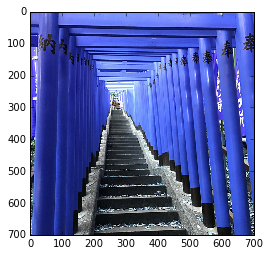

In [145]:
plt.imshow(img)

In [146]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

array([[[219, 106,  98],
        [220, 109, 100],
        [216, 108,  96],
        ..., 
        [250,  99,  78],
        [249,  98,  77],
        [249,  97,  76]],

       [[220, 107,  99],
        [222, 111, 102],
        [224, 116, 104],
        ..., 
        [249,  99,  75],
        [248,  98,  74],
        [250,  98,  75]],

       [[221, 108, 100],
        [223, 112, 103],
        [223, 115, 103],
        ..., 
        [247,  96,  75],
        [249,  98,  77],
        [251,  99,  78]],

       ..., 
       [[207, 212, 190],
        [203, 213, 189],
        [196, 201, 179],
        ..., 
        [146, 140, 124],
        [207, 205, 190],
        [220, 218, 205]],

       [[201, 209, 185],
        [189, 197, 176],
        [189, 198, 179],
        ..., 
        [  0,   2,   0],
        [ 30,  21,  12],
        [ 62,  55,  36]],

       [[177, 182, 162],
        [175, 187, 163],
        [220, 234, 211],
        ..., 
        [  8,   0,   0],
        [  9,   0,   0],
        [ 28,  20,

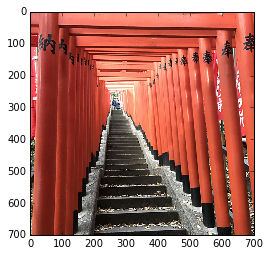

In [147]:
plt.imshow(img)
img

(2, 2, 3)


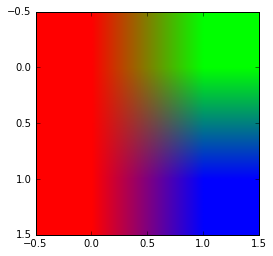

In [148]:
#好きなカラーを表示させてみよう
fav_color = np.array([100, 100, 255]) 
#test_img = np.array([[fav_color]*2]*2, np.uint8)
test_img = np.array([[[255, 0, 0], [0, 255, 0]], [[255, 0, 0], [0, 0, 255]]], np.uint8)
print(test_img.shape)
plt.imshow(test_img)

[[139 141 139 ..., 142 141 140]
 [140 143 147 ..., 141 140 141]
 [141 144 146 ..., 139 141 142]
 ..., 
 [208 207 197 ..., 140 204 217]
 [204 192 193 ...,   1  23  55]
 [178 181 227 ...,   2   3  21]]
(700, 700)


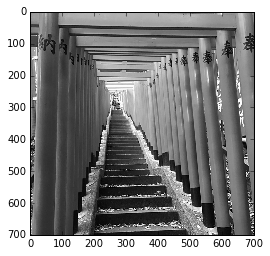

In [150]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray_img)
print(gray_img.shape)
plt.imshow(gray_img)
plt.gray()

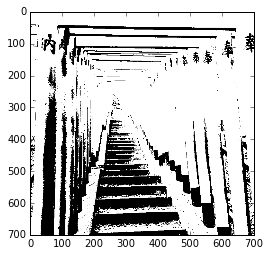

In [157]:
#閾値処理
#100になっているところを変えてみよう
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_img)

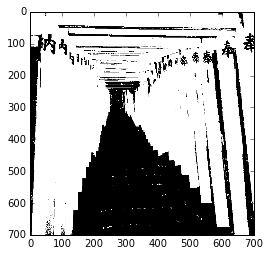

In [182]:
piet = cv2.imread('sample01.jpg')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)
#print(piet_hsv)
#RGBとの違いを見てみよう(H:色相, S:彩度, V:明度)
hsv_min = np.array([0, 100, 100], np.uint8)
hsv_max = np.array([50, 255, 255], np.uint8)
threshold_img = cv2.inRange(piet_hsv, hsv_min, hsv_max)
 
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
 
plt.imshow(threshold_img)

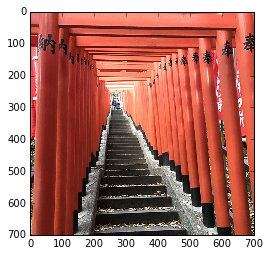

In [190]:
#マスク作成
upstate = cv2.imread('sample01.jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

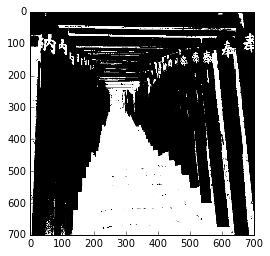

In [191]:
#マスク可視化
mask_inverse = cv2.inRange(upstate_hsv, hsv_min, hsv_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

True

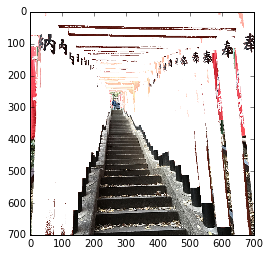

In [194]:
#マスクした部分を白に
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)
masked_replace_white = cv2.addWeighted(masked_upstate, 1, cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))
#cv2.imwrite(ファイル名, 保存したいデータ)で書き出し！
cv2.imwrite('masked_image.jpg', masked_replace_white)

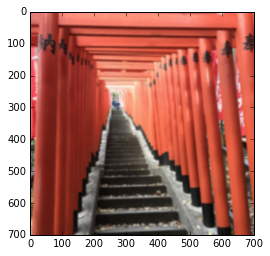

In [203]:
#ぼかし
img  = cv2.imread('sample01.jpg')
img_blur = cv2.GaussianBlur(img, (15,15), 0)
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))

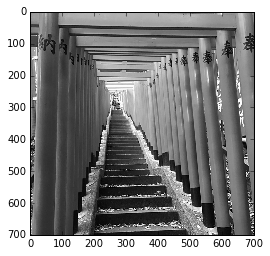

In [222]:
plt.imshow(gray_img)

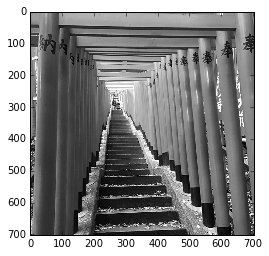

In [244]:
#ゼロパディング
conv_img = np.zeros((gray_img.shape[0]+2, gray_img.shape[1]+2))
conv_img[1:conv_img.shape[0] -1 , 1:conv_img.shape[1] -1] = gray_img
plt.imshow(conv_img)

True

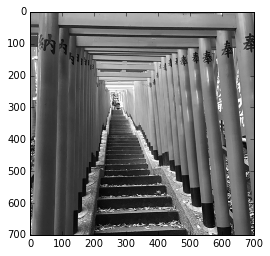

In [274]:
#フィルタ作成
filter_size = 3
user_filter = np.array([
        [1/9, 1/9, 1/9], 
        [1/9, 1/9, 1/9], 
        [1/9, 1/9, 1/9]])

#画像準備
#ループ内側がヨコ移動
filtered_img = np.zeros(gray_img.shape)
for i in range(0, conv_img.shape[0] - filter_size  + 1):
    for j in range(0, conv_img.shape[1] - filter_size  + 1):
        filtered_img[i][j] = np.sum(conv_img[i : i + 3, j: j + 3] * user_filter)

plt.imshow(filtered_img)
cv2.imwrite('filtered_image.jpg', filtered_img)

    
    

11